In [1]:
def csv(file):
    dataset = [] 
    data = open(file,'r').readlines() 
    for i in data: 
        row=i.split(',') 
        t=list(map(float,row[:-1])) 
        if row[-1]=='M\n': 
            t.append(1) 
        else:
            t.append(0) 
        dataset.append(t) 
    return dataset[:len(dataset)-100] 
file = 'mydata.csv' 
dataset = csv(file)

In [2]:
from random import randrange 
def split(dataset, n): 
    t = list() 
    dataset_copy = list(dataset) 
    fold_size = len(dataset) // n 
    for i in range(n): 
        fold = list() 
        while len(fold) < fold_size: 
            index = randrange(0, len(dataset_copy)) 
            fold.append(dataset_copy.pop(index))    
        t.append(fold) 
    return t 

In [3]:
def findmetrics(act, pred):
    tn,tp,fn,fp,= 0,0,0,0 
    for i in range(len(act)): 
        if act[i] == 1 and pred[i]==1: 
            tp+=1
        elif act[i]==1 and pred[i]==0:
            fn+=1
        elif act[i]==0 and pred[i]==1:
            fp+=1
        else: 
            tn+=1
    return [(tn+tp)/(tn+tp+fn+fp),str(tp)+'  '+str(fn)+'\n'+str(fp)+'  '+str(tn),tp/(tp+fp),tp/(tp+fn)]

In [4]:
def algorithm(dataset, algo, n, *args):
    folds =split(dataset, n) 
    scores = list() 
    for i in range(len(folds)): 
        train_set = list(folds) 
        train_set.remove(folds[i]) 
        train_set = sum(train_set, []) 
        test_set = list() 
        actual=list()
        for row in folds[i]:
            row_c = list(row) 
            actual.append(row_c[-1]) 
            row_c[-1] = None 
            test_set.append(row_c) 
        
        predicted = algo(train_set, test_set, *args) 
        metrics = findmetrics(actual, predicted) 
        print(' Fold',i+1,':')
        print(' the Hyperparameters')
        print('Completed Cumulative Epochs : ',4000*(i+1))
        print('Learning rate : ',0.02,'\n')
        print('Metrics -')
        print('Accuracy : ',metrics[0]) 
        print('Confusion Matrix:\n'+metrics[1])
        print('Precision : ',metrics[2])
        print('Recall : ',metrics[3],'\n')
        scores.append(metrics[0])
    return scores

In [5]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i] 
    return 1.0 if activation>= 0.0 else 0.0 

In [6]:
def train_it(train, lerate, noepoch):
    weights = [0.0 for i in range(len(train[0]))] 
    for epoch in range(noepoch): 
        sum_error = 0.0  
        for row in train: 
            prediction = predict(row, weights) 
            error = row[-1] - prediction 
            sum_error += error**2 
            weights[0] = weights[0] + lerate * error
            for i in range(len(row)-1): 
                weights[i + 1] = weights[i + 1] + lerate * error * row[i] 
        error_data.append((epoch, sum_error)) 
    return weights

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
def plot(error_data,a): 
    x=[error_data[i+4000*a][0] for i in range(0,4000)] 
    y=[error_data[i+4000*a][1] for i in range(0,4000)] 
    ax=sns.lineplot(x,y,color="coral") 
    
    ax.set_title('Fold '+str(a+1)+' loss function/Squared sum plot') 
    ax.set(xlabel='Epochs',ylabel='Squared Error') 
    plt.show() 



In [8]:

def perceptron(train, test, lerate, noepoch):
    predictions = list() 
    weights = train_it(train, lerate, noepoch) 
    stor_weights.append(weights)
    for row in test: 
        prediction = predict(row, weights) 
        predictions.append(prediction) 
    return predictions

Training phase 
 Fold 1 :
 the Hyperparameters
Completed Cumulative Epochs :  4000
Learning rate :  0.02 

Metrics -
Accuracy :  0.8653846153846154
Confusion Matrix:
55  1
20  80
Precision :  0.7333333333333333
Recall :  0.9821428571428571 

 Fold 2 :
 the Hyperparameters
Completed Cumulative Epochs :  8000
Learning rate :  0.02 

Metrics -
Accuracy :  0.9166666666666666
Confusion Matrix:
56  7
6  87
Precision :  0.9032258064516129
Recall :  0.8888888888888888 

 Fold 3 :
 the Hyperparameters
Completed Cumulative Epochs :  12000
Learning rate :  0.02 

Metrics -
Accuracy :  0.9487179487179487
Confusion Matrix:
66  3
5  82
Precision :  0.9295774647887324
Recall :  0.9565217391304348 

Results obtained in every run:



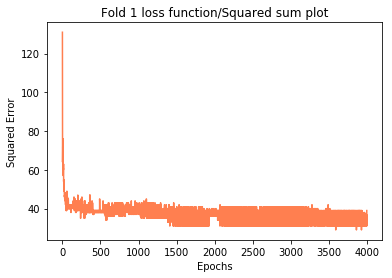

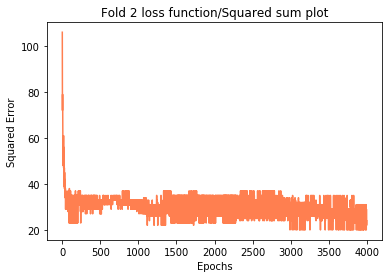

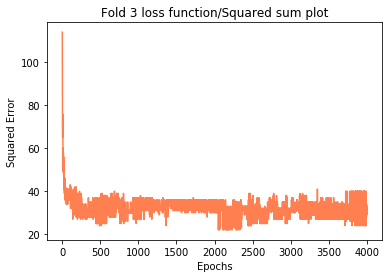

All Accuracy Scores:  [0.8653846153846154, 0.9166666666666666, 0.9487179487179487]
Average Accuracy:  0.9102564102564102

Initial start weights: 
[-114.33999999999439, -866.8377600002635, 413.44599999961395, -2152.3784000000596, -37.492000000044605, 17.12043460000074, 98.55059120004962, 138.5642768499708, 57.47543855997716, 23.635165999993436, 5.651771999999506, -10.99009599999335, -101.01004999998716, 205.95503400013394, 221.46496000014096, 3.757818039999993, 32.483994839989656, 40.91241074998379, 8.766199879996298, 13.752586620002113, 3.139410459999761, -777.2836400002138, 801.054600000204, 327.2651999997954, 243.28599999993844, 32.78982680001348, 323.4714824000987, 388.86791827995825, 107.68653624003852, 107.05767399999024, 30.799974400016023]

Updated Final Weights: 
[-117.3399999999938, -833.8852800002268, 231.58619999954928, -1967.9187999988064, 5.3779999999409505, 11.320493399996964, 95.73333200001146, 133.17430307799597, 50.450584320000104, 12.812148000002747, 4.405783600001874

In [9]:
nofolds = 3 
lerate = 0.02 
noepoch = 4000 

error_data = list() 
stor_weights = list() 
print('Training phase ')
scores = algorithm(dataset, perceptron, nofolds, lerate, noepoch)

print('Results obtained in every run:\n')


for i in range(3):
    plot(error_data,i)
print(' All Accuracy Scores: ',scores)
print(' Average Accuracy: ',sum(scores)/len(scores))
print('\n Initial start weights: ')
print(stor_weights[0])
w_test = stor_weights[-1]
print('\n Updated Final Weights: ')
print(w_test,'\n')

print("test results for an new dataset ")
act,pred=[],[]
for i in range(100):
    act.append(dataset[len(dataset)-i-1][30])
    pred.append(predict(dataset[len(dataset)-i-1], w_test))

metrics=findmetrics(act,pred)
print('\n Accuracy: ',metrics[0])
print('Confusion Matrix:\n'+metrics[1])
print(' Recall: ',metrics[3])
print(' Precision: ',metrics[2])


- Conclusion and Justification -

A straightforward Single Layer Perceptron calculation was run on the Diabetes (Type 1 - Type 2) dataset utilizing K-Folds Cross Validation and SGD. The testing precision acquired was around 91.2% in the training dataset and 92.8% on an random dataset, among other pertinent measurements. 

The three charts acquired show the squared error sum function for every epoch, and for every considered fold. As we can see, the error diminishes as the number of iterations increase. 